In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd

In [2]:
num_words = 10000
max_len = 200

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words= num_words)

# Pad The Sequences to ensure the same length

X_train = pad_sequences(X_train, maxlen=max_len, padding="post", truncating="post")
X_test = pad_sequences(X_test, maxlen=max_len, padding="post", truncating="post")

print(f"Training data shape: {X_train.shape}, Labels: {Y_train.shape}")
print(f"Testing data shape: {Y_test.shape}, Labels: {Y_test.shape}")

Training data shape: (25000, 200), Labels: (25000,)
Testing data shape: (25000,), Labels: (25000,)


In [3]:
# Define the model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative sentiment)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\kille\anaconda3\envs\project\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=64,
    epochs=5
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 263ms/step - accuracy: 0.5072 - loss: 0.6946 - val_accuracy: 0.5420 - val_loss: 0.6856
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 297ms/step - accuracy: 0.5771 - loss: 0.6672 - val_accuracy: 0.6046 - val_loss: 0.6400
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 357ms/step - accuracy: 0.5962 - loss: 0.6524 - val_accuracy: 0.5434 - val_loss: 0.8053
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 119s 297ms/step - accuracy: 0.6516 - loss: 0.6166 - val_accuracy: 0.8154 - val_loss: 0.4411
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 287ms/step - accuracy: 0.8600 - loss: 0.3725 - val_accuracy: 0.8562 - val_loss: 0.3516


In [5]:
test_loss, test_accu = model.evaluate(X_test, Y_test, verbose = 1)
print(f"The loss On the test Data Is: {test_loss}, and the Accuracy is: {test_accu}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.8544 - loss: 0.3518
The loss On the test Data Is: 0.3516388535499573, and the Accuracy is: 0.8561999797821045


In [6]:
# Load the word index
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode a review The i-3 is because of Padding And Other Stuffs
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Example review (encoded and padded)
sample_review = X_test[0]
print(f"Sample review: {decode_review(sample_review)}")
print(f"True Sentiment: {'Positive' if Y_test[0] == 1 else 'Negative'}")

# Predict sentiment
prediction = model.predict(np.array([sample_review]))
print(f"Predicted Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")


Sample review: ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
True Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
Predicted Sentiment: Negative


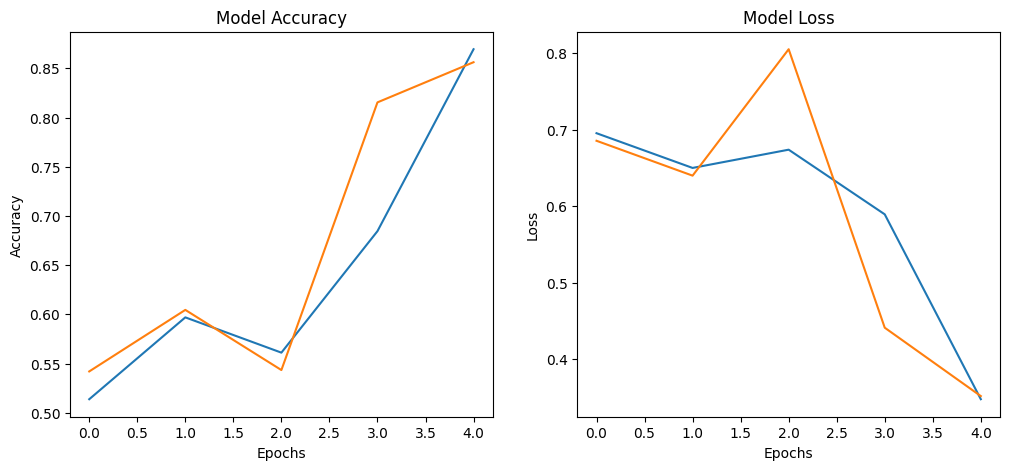

In [7]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


In [8]:
from tensorflow.keras.models import load_model
model.save("imdb_sentiment_model.h5")
